In [1]:
import sys

In [2]:
sys.path.insert(1,'../src')
sys.path.insert(1,'../src/ITE-1.1_code')

In [3]:
#from latentNoise_funcs_gen   import *

In [4]:

from funcs_LNC import *

In [5]:
import matplotlib.pyplot as plt

In [6]:
x = onp.random.normal(size=1000, scale=0.1)
z = onp.random.uniform(size=1000, low=-3.14, high=3.14)
y = 5*x + onp.sin(z)

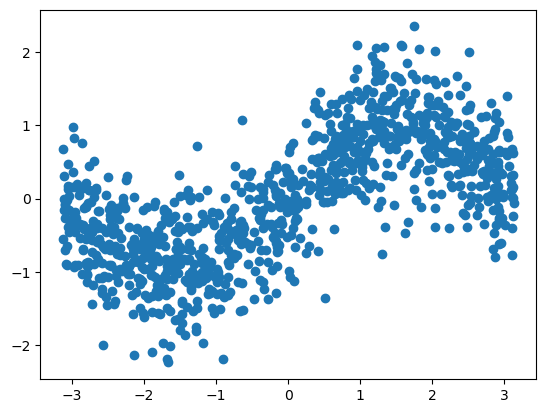

In [7]:
plt.scatter(z, y)

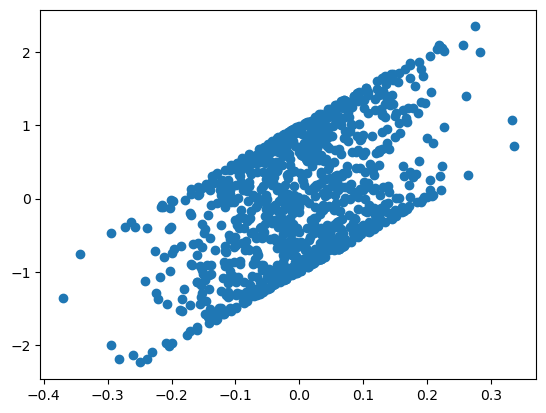

In [8]:
plt.scatter(x, y)

In [9]:
x = np.array(x[:,None])
y = np.array(y[:,None])
n = x.shape[0]
ws = np.ones(n)

In [10]:
lam = np.array(0.01)
K = rbf_kernel_matrix({'gamma': 1}, z, z)

weights, beta, resids, y_hat = krrModel_lin(lam, K, x, y, ws)

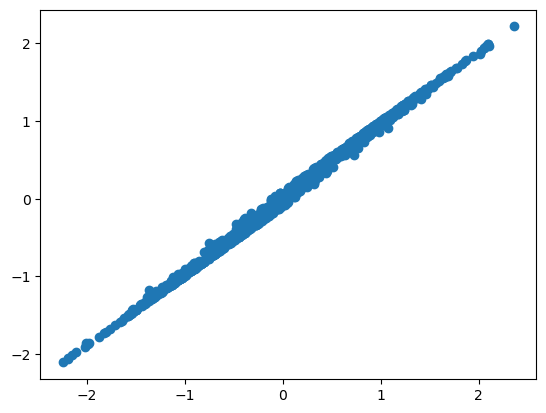

In [11]:
plt.scatter(y, y_hat)

In [12]:
np.dot(K, weights)

DeviceArray([[-0.547],
             [ 0.976],
             [ 0.051],
             [-0.952],
             [-0.581],
             [-0.311],
             [-0.114],
             [ 0.765],
             [-0.491],
             [-0.538],
             [-0.992],
             [-0.044],
             [ 0.317],
             [-0.927],
             [-0.414],
             [ 0.114],
             [ 0.917],
             [-0.852],
             [-0.839],
             [-0.453],
             [ 0.979],
             [-0.402],
             [-0.625],
             [ 0.103],
             [ 1.   ],
             [-0.809],
             [-0.007],
             [ 0.274],
             [-0.343],
             [ 1.003],
             [-0.985],
             [ 0.614],
             [ 0.967],
             [ 0.791],
             [ 0.726],
             [ 0.932],
             [-0.188],
             [ 0.782],
             [-0.881],
             [-0.892],
             [-0.691],
             [ 0.886],
             [ 1.002],
           

## optimize for hyperparameter choice

In [13]:
# beta: np.ndarray, neta: np.ndarray,  lam: np.ndarray, lu: np.ndarray
beta = np.array(1.0) # mse
neta = np.array(1.0) # indep zs
lam = np.array(0.01) # krr
nu = np.array(1.0) # z norm
lu = np.array(0.0) # CI indep
pars = (beta, neta, lam, nu, lu)  


In [14]:
# epchs:int, bs:int, reps:int, lr: float, job:int
num_epochs = 1000
report_freq = 10#num_epochs
num_reps = 8
batch_size = 100
learning_rate = 0.001
job = 1

In [15]:
# read file
import pandas as pd
folder = "/home/emiliano/Documents/ISP/postdoc/discoveringLatentConfounders/data/data_to_try/13:45:44_14092023/"
file = "5_exponential1gaussian1_dependent_10_1_100.csv"


2023-09-21 13:59:02,726:INFO:NumExpr defaulting to 8 threads.


In [16]:
def readMeta(folder, file):
    meta = pd.read_csv(folder+file, sep="#", nrows=17, header=None)
    meta = [el.split(" ",2)[1:3] for el in meta[1].tolist()]
    meta  = {el[0]:el[1] for el in meta}
    meta["latents"] = int(meta["latents"])
    meta["confounder"] = int(meta["confounder"])
    meta["noisesd"] = float(meta["noisesd"])
    meta["independent"] = meta["independent"]=="TRUE"
    meta["ncl"] = int(meta["ncl"])
    meta["size"] = int(meta["size"])
    meta["ix"] = [int(el) for el in meta["ix"].replace("c(","").replace(")","").replace(" ","").split(",")]
    meta["iy"] = [int(el) for el in meta["iy"].replace("c(","").replace(")","").replace(" ","").split(",")]
    meta["ic"] = int(meta["ic"])
    meta["causal_coeff"] = float(meta["causal_coeff"])
    meta["coefx"] = [float(el) for el in meta["coefx"].replace("c(","").replace(")","").replace(" ","").split(",")]
    meta["coefy"] = [float(el) for el in meta["coefy"].replace("c(","").replace(")","").replace(" ","").split(",")]
    return meta

In [17]:
meta = readMeta(folder, file)

In [18]:
data = pd.read_csv(folder+file, skiprows=17)

In [19]:
data.head()

,Unnamed: 0,Z.1,Z.2,Z.3,Z.4,Z.5,Z.6,Z.7,Z.8,Z.9,...,U.93,U.94,U.95,U.96,U.97,U.98,U.99,U.100,X,Y
0,1,-4.257510,-2.628083,1.532396,2.106480,2.555447,0.548185,-0.873037,-2.582866,1.201632,...,2.943411,3.433972,-12.059140,-1.084468,-10.062209,2.632646,-2.679277,-6.939442,2.196186,-6.230360
1,2,-6.186321,2.158373,4.087255,5.089037,-1.557615,0.354011,-0.410917,1.112464,3.247618,...,11.557239,6.252577,-4.917907,-7.701617,-0.418536,-5.409675,-6.676294,4.506038,-0.358376,-8.280630
2,3,0.922623,2.829448,-3.500332,0.164894,2.403200,2.056119,2.282143,2.957012,-3.086380,...,-2.903270,2.379708,-3.457482,24.731770,11.718584,-7.371640,15.737050,-0.989652,2.461117,0.630075
3,4,-0.198229,-0.518078,2.199180,-3.302215,-4.793345,0.072418,-2.818797,0.556005,-1.828017,...,-4.262228,-2.821497,6.181105,-9.139552,-6.957557,-11.686181,8.437655,0.999168,3.134817,-3.971889
4,5,5.846498,0.385424,-3.343436,-0.239071,4.617033,4.394828,5.976737,1.227569,-1.022016,...,-8.295679,-8.060914,3.325531,24.612512,13.523935,13.928673,5.056496,4.155581,0.975887,10.689424


In [20]:
data.columns[10]

'Z.10'

In [21]:
data.shape

(1000, 113)

In [22]:
zcols = ["Z."+str(i) for i in range(1,11)]
ucols = ["U."+str(i) for i in range(1,101)]

In [23]:
x= np.array(data["X"])[:,None]
x_std = np.std(x)
x = stdrze(x)
y= np.array(data["Y"])[:,None]
y_std = np.std(y)
y = stdrze(y)
Z= np.array(onp.apply_along_axis(stdrze, 0, data[zcols]))
U= np.array(onp.apply_along_axis(stdrze,0, data[ucols]))
x_std

DeviceArray(3.576, dtype=float32)

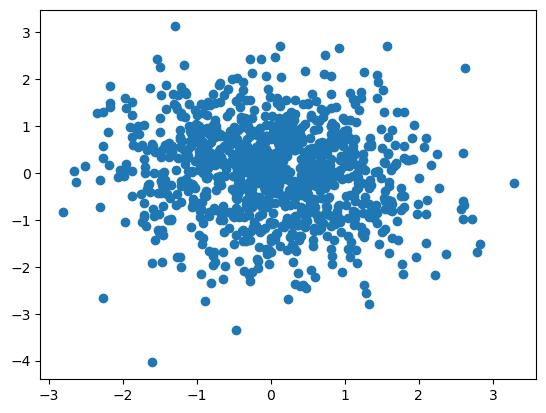

In [24]:
plt.scatter(x, y)

In [25]:
onp.corrcoef(x, y, rowvar=False)

array([[ 1.   , -0.121],
       [-0.121,  1.   ]])

In [26]:
x_stdr = (x-np.mean(x))/np.std(x)
y_stdr = (y-np.mean(y))/np.std(y)
x_stdr.T@y_stdr/x_stdr.shape[0]

DeviceArray([[-0.121]], dtype=float32)

In [27]:
embedding = Isomap(n_components=10)
xy = onp.hstack([x, y])
xy_transformed = embedding.fit_transform(xy)
zc_ini = np.array(xy_transformed[:,3])[:,None]

In [28]:
hsicRBF(x, y)

DeviceArray(0.011, dtype=float32)

In [29]:
hsicRBF(zc_ini, y)

DeviceArray(0.047, dtype=float32)

In [30]:
hsicRBF(zc_ini, x)

DeviceArray(0.267, dtype=float32)

In [31]:
y.shape

(1000, 1)

In [32]:
# ix c(8, 2, 3)
# iy c(1, 7, 6)
# ic 10
Z[:,[7,1,2]]

DeviceArray([[-1.095, -1.185,  0.497],
             [ 0.467,  0.981,  1.375],
             [ 1.247,  1.285, -1.231],
             ...,
             [ 0.885,  0.34 , -0.044],
             [-0.808,  0.143, -0.166],
             [-1.095, -0.601,  1.024]], dtype=float32)

In [33]:
# only valid for "5_exponential1gaussian1_dependent_10_1_100.csv"
    # ix c(8, 2, 3) -> [7,1,2]
    # iy c(1, 7, 6) -> [0,6,5]
    # ic 10 -> 9
    
idx_x = np.array(meta["ix"]) #np.array([7, 1, 2])
idx_y = np.array(meta["iy"]) #np.array([0, 6, 5])
idx_c = np.array([meta["ic"]]) ##np.array([9])
idxs = (idx_x, idx_y, idx_c)
# beta/sd(y)*sd(x)
beta_real = np.array(meta["causal_coeff"]/y_std*x_std) #np.array(-0.906402849592268/y_std*x_std)
beta_real

DeviceArray(-0.487, dtype=float32)

In [34]:
idx_x, idx_y, idx_c = idxs
    
zx_real = Z[:,idx_x]
zy_real = Z[:,idx_y]
zc_real = Z[:,idx_c]

In [35]:
zc_real.shape

(1000, 1)

In [36]:
# read in indices and beta real

In [37]:

nm = "test"

In [ ]:
res = getLatentZ_wrapper(x, y, Z, U, idxs, beta_real, nm, pars, num_epochs, report_freq, num_reps, batch_size, learning_rate, job)

nm: test
alpha x shape:  (1000, 8)
N:  1000
batch size:  100
batch per_epoch:  10
epochs2:  100
epochs eff:  100
num_iters:  1000
num_reports:  101
report_freq:  10
iteration:  0
iteration report:  0
K_x.shape (1000, 1000)
monitor
{'beta': DeviceArray([[-0.182]], dtype=float32), 'beta_u': DeviceArray([[-0.112]], dtype=float32), 'beta_x': DeviceArray([[-0.121]], dtype=float32), 'bias_beta': DeviceArray([[0.305]], dtype=float32), 'bias_beta_rel_u': DeviceArray([[0.813]], dtype=float32), 'bias_beta_rel_x': DeviceArray([[0.834]], dtype=float32), 'bias_beta_u': DeviceArray([[0.375]], dtype=float32), 'bias_beta_x': DeviceArray([[0.365]], dtype=float32), 'corr_zc': DeviceArray([0.025], dtype=float32), 'hsic_indep': DeviceArray(-15.421, dtype=float32), 'hsic_ry_zx': DeviceArray(0.247, dtype=float32), 'hsic_x_zc': DeviceArray(0.253, dtype=float32), 'hsic_xy_zc': DeviceArray(-4.665, dtype=float32), 'hsic_y_zc': DeviceArray(0.037, dtype=float32), 'hsic_zc': DeviceArray(0.08, dtype=float32), 'hsic

iteration report:  0
monitor
{'beta': DeviceArray([[-0.184]], dtype=float32), 'beta_u': DeviceArray([[-0.112]], dtype=float32), 'beta_x': DeviceArray([[-0.121]], dtype=float32), 'bias_beta': DeviceArray([[0.303]], dtype=float32), 'bias_beta_rel_u': DeviceArray([[0.809]], dtype=float32), 'bias_beta_rel_x': DeviceArray([[0.829]], dtype=float32), 'bias_beta_u': DeviceArray([[0.375]], dtype=float32), 'bias_beta_x': DeviceArray([[0.365]], dtype=float32), 'corr_zc': DeviceArray([0.025], dtype=float32), 'hsic_indep': DeviceArray(-15.594, dtype=float32), 'hsic_ry_zx': DeviceArray(0.342, dtype=float32), 'hsic_x_zc': DeviceArray(0.253, dtype=float32), 'hsic_xy_zc': DeviceArray(-4.665, dtype=float32), 'hsic_y_zc': DeviceArray(0.037, dtype=float32), 'hsic_zc': DeviceArray(0.08, dtype=float32), 'hsic_zx': DeviceArray(0.073, dtype=float32), 'hsic_zx_zc': DeviceArray(0.157, dtype=float32), 'hsic_zx_zy': DeviceArray(0.012, dtype=float32), 'hsic_zy': DeviceArray(0.079, dtype=float32), 'hsic_zy_x': Devi

/home/emiliano/anaconda3/lib/python3.7/site-packages/jax/lax/lax.py:5946: UserWarning: Explicitly requested dtype <class 'int'> requested in linspace is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))


smpl:  [26 48 59 63]
smpl:  [ 8 11 14 24]
smpl:  [1 2 3 9]
smpl:  [ 4  8 25 26]
smpl:  [ 6 40 42 44]
smpl:  [11 25 27 33]
smpl:  [10 13 22 27]
smpl:  [ 6 15 39 47]
iteration report:  10
monitor
{'beta': DeviceArray([[0.024]], dtype=float32), 'beta_u': DeviceArray([[-0.112]], dtype=float32), 'beta_x': DeviceArray([[-0.121]], dtype=float32), 'bias_beta': DeviceArray([[0.511]], dtype=float32), 'bias_beta_rel_u': DeviceArray([[1.365]], dtype=float32), 'bias_beta_rel_x': DeviceArray([[1.399]], dtype=float32), 'bias_beta_u': DeviceArray([[0.375]], dtype=float32), 'bias_beta_x': DeviceArray([[0.365]], dtype=float32), 'corr_zc': DeviceArray([0.216], dtype=float32), 'hsic_indep': DeviceArray(-19.091, dtype=float32), 'hsic_ry_zx': DeviceArray(0.069, dtype=float32), 'hsic_x_zc': DeviceArray(0.029, dtype=float32), 'hsic_xy_zc': DeviceArray(-6.575, dtype=float32), 'hsic_y_zc': DeviceArray(0.047, dtype=float32), 'hsic_zc': DeviceArray(0.072, dtype=float32), 'hsic_zx': DeviceArray(0.047, dtype=float3

iteration report:  10
monitor
{'beta': DeviceArray([[0.004]], dtype=float32), 'beta_u': DeviceArray([[-0.112]], dtype=float32), 'beta_x': DeviceArray([[-0.121]], dtype=float32), 'bias_beta': DeviceArray([[0.491]], dtype=float32), 'bias_beta_rel_u': DeviceArray([[1.311]], dtype=float32), 'bias_beta_rel_x': DeviceArray([[1.344]], dtype=float32), 'bias_beta_u': DeviceArray([[0.375]], dtype=float32), 'bias_beta_x': DeviceArray([[0.365]], dtype=float32), 'corr_zc': DeviceArray([0.05], dtype=float32), 'hsic_indep': DeviceArray(-19.31, dtype=float32), 'hsic_ry_zx': DeviceArray(0.309, dtype=float32), 'hsic_x_zc': DeviceArray(0.06, dtype=float32), 'hsic_xy_zc': DeviceArray(-6.171, dtype=float32), 'hsic_y_zc': DeviceArray(0.035, dtype=float32), 'hsic_zc': DeviceArray(0.034, dtype=float32), 'hsic_zx': DeviceArray(0.117, dtype=float32), 'hsic_zx_zc': DeviceArray(0.031, dtype=float32), 'hsic_zx_zy': DeviceArray(0.002, dtype=float32), 'hsic_zy': DeviceArray(0.073, dtype=float32), 'hsic_zy_x': Device

iteration report:  20
monitor
{'beta': DeviceArray([[0.06]], dtype=float32), 'beta_u': DeviceArray([[-0.112]], dtype=float32), 'beta_x': DeviceArray([[-0.121]], dtype=float32), 'bias_beta': DeviceArray([[0.546]], dtype=float32), 'bias_beta_rel_u': DeviceArray([[1.459]], dtype=float32), 'bias_beta_rel_x': DeviceArray([[1.495]], dtype=float32), 'bias_beta_u': DeviceArray([[0.375]], dtype=float32), 'bias_beta_x': DeviceArray([[0.365]], dtype=float32), 'corr_zc': DeviceArray([0.353], dtype=float32), 'hsic_indep': DeviceArray(-19.412, dtype=float32), 'hsic_ry_zx': DeviceArray(0.158, dtype=float32), 'hsic_x_zc': DeviceArray(0.021, dtype=float32), 'hsic_xy_zc': DeviceArray(-7.745, dtype=float32), 'hsic_y_zc': DeviceArray(0.02, dtype=float32), 'hsic_zc': DeviceArray(0.113, dtype=float32), 'hsic_zx': DeviceArray(0.075, dtype=float32), 'hsic_zx_zc': DeviceArray(0.02, dtype=float32), 'hsic_zx_zy': DeviceArray(0.005, dtype=float32), 'hsic_zy': DeviceArray(0.058, dtype=float32), 'hsic_zy_x': Device

iteration report:  30
monitor
{'beta': DeviceArray([[0.041]], dtype=float32), 'beta_u': DeviceArray([[-0.112]], dtype=float32), 'beta_x': DeviceArray([[-0.121]], dtype=float32), 'bias_beta': DeviceArray([[0.528]], dtype=float32), 'bias_beta_rel_u': DeviceArray([[1.409]], dtype=float32), 'bias_beta_rel_x': DeviceArray([[1.444]], dtype=float32), 'bias_beta_u': DeviceArray([[0.375]], dtype=float32), 'bias_beta_x': DeviceArray([[0.365]], dtype=float32), 'corr_zc': DeviceArray([0.28], dtype=float32), 'hsic_indep': DeviceArray(-21.759, dtype=float32), 'hsic_ry_zx': DeviceArray(0.016, dtype=float32), 'hsic_x_zc': DeviceArray(0.058, dtype=float32), 'hsic_xy_zc': DeviceArray(-6.432, dtype=float32), 'hsic_y_zc': DeviceArray(0.028, dtype=float32), 'hsic_zc': DeviceArray(0.067, dtype=float32), 'hsic_zx': DeviceArray(0.131, dtype=float32), 'hsic_zx_zc': DeviceArray(0.016, dtype=float32), 'hsic_zx_zy': DeviceArray(0.005, dtype=float32), 'hsic_zy': DeviceArray(0.056, dtype=float32), 'hsic_zy_x': Devi

iteration report:  40
monitor
{'beta': DeviceArray([[0.114]], dtype=float32), 'beta_u': DeviceArray([[-0.112]], dtype=float32), 'beta_x': DeviceArray([[-0.121]], dtype=float32), 'bias_beta': DeviceArray([[0.601]], dtype=float32), 'bias_beta_rel_u': DeviceArray([[1.605]], dtype=float32), 'bias_beta_rel_x': DeviceArray([[1.645]], dtype=float32), 'bias_beta_u': DeviceArray([[0.375]], dtype=float32), 'bias_beta_x': DeviceArray([[0.365]], dtype=float32), 'corr_zc': DeviceArray([0.039], dtype=float32), 'hsic_indep': DeviceArray(-19.926, dtype=float32), 'hsic_ry_zx': DeviceArray(0.049, dtype=float32), 'hsic_x_zc': DeviceArray(0.023, dtype=float32), 'hsic_xy_zc': DeviceArray(-7.452, dtype=float32), 'hsic_y_zc': DeviceArray(0.025, dtype=float32), 'hsic_zc': DeviceArray(0.007, dtype=float32), 'hsic_zx': DeviceArray(0.052, dtype=float32), 'hsic_zx_zc': DeviceArray(0.006, dtype=float32), 'hsic_zx_zy': DeviceArray(0.007, dtype=float32), 'hsic_zy': DeviceArray(0.083, dtype=float32), 'hsic_zy_x': Dev

iteration report:  50
monitor
{'beta': DeviceArray([[0.089]], dtype=float32), 'beta_u': DeviceArray([[-0.112]], dtype=float32), 'beta_x': DeviceArray([[-0.121]], dtype=float32), 'bias_beta': DeviceArray([[0.576]], dtype=float32), 'bias_beta_rel_u': DeviceArray([[1.536]], dtype=float32), 'bias_beta_rel_x': DeviceArray([[1.575]], dtype=float32), 'bias_beta_u': DeviceArray([[0.375]], dtype=float32), 'bias_beta_x': DeviceArray([[0.365]], dtype=float32), 'corr_zc': DeviceArray([0.155], dtype=float32), 'hsic_indep': DeviceArray(-20.504, dtype=float32), 'hsic_ry_zx': DeviceArray(0.021, dtype=float32), 'hsic_x_zc': DeviceArray(0.035, dtype=float32), 'hsic_xy_zc': DeviceArray(-7.627, dtype=float32), 'hsic_y_zc': DeviceArray(0.014, dtype=float32), 'hsic_zc': DeviceArray(0.026, dtype=float32), 'hsic_zx': DeviceArray(0.051, dtype=float32), 'hsic_zx_zc': DeviceArray(0.013, dtype=float32), 'hsic_zx_zy': DeviceArray(0.006, dtype=float32), 'hsic_zy': DeviceArray(0.087, dtype=float32), 'hsic_zy_x': Dev

iteration report:  60
monitor
{'beta': DeviceArray([[0.089]], dtype=float32), 'beta_u': DeviceArray([[-0.112]], dtype=float32), 'beta_x': DeviceArray([[-0.121]], dtype=float32), 'bias_beta': DeviceArray([[0.576]], dtype=float32), 'bias_beta_rel_u': DeviceArray([[1.537]], dtype=float32), 'bias_beta_rel_x': DeviceArray([[1.575]], dtype=float32), 'bias_beta_u': DeviceArray([[0.375]], dtype=float32), 'bias_beta_x': DeviceArray([[0.365]], dtype=float32), 'corr_zc': DeviceArray([0.106], dtype=float32), 'hsic_indep': DeviceArray(-22.331, dtype=float32), 'hsic_ry_zx': DeviceArray(0.006, dtype=float32), 'hsic_x_zc': DeviceArray(0.003, dtype=float32), 'hsic_xy_zc': DeviceArray(-9.875, dtype=float32), 'hsic_y_zc': DeviceArray(0.018, dtype=float32), 'hsic_zc': DeviceArray(0.03, dtype=float32), 'hsic_zx': DeviceArray(0.06, dtype=float32), 'hsic_zx_zc': DeviceArray(0.01, dtype=float32), 'hsic_zx_zy': DeviceArray(0.005, dtype=float32), 'hsic_zy': DeviceArray(0.096, dtype=float32), 'hsic_zy_x': Device

iteration report:  70
monitor
{'beta': DeviceArray([[0.103]], dtype=float32), 'beta_u': DeviceArray([[-0.112]], dtype=float32), 'beta_x': DeviceArray([[-0.121]], dtype=float32), 'bias_beta': DeviceArray([[0.59]], dtype=float32), 'bias_beta_rel_u': DeviceArray([[1.574]], dtype=float32), 'bias_beta_rel_x': DeviceArray([[1.613]], dtype=float32), 'bias_beta_u': DeviceArray([[0.375]], dtype=float32), 'bias_beta_x': DeviceArray([[0.365]], dtype=float32), 'corr_zc': DeviceArray([0.087], dtype=float32), 'hsic_indep': DeviceArray(-20.351, dtype=float32), 'hsic_ry_zx': DeviceArray(0.017, dtype=float32), 'hsic_x_zc': DeviceArray(0.012, dtype=float32), 'hsic_xy_zc': DeviceArray(-7.5, dtype=float32), 'hsic_y_zc': DeviceArray(0.045, dtype=float32), 'hsic_zc': DeviceArray(0.024, dtype=float32), 'hsic_zx': DeviceArray(0.053, dtype=float32), 'hsic_zx_zc': DeviceArray(0.01, dtype=float32), 'hsic_zx_zy': DeviceArray(0.013, dtype=float32), 'hsic_zy': DeviceArray(0.066, dtype=float32), 'hsic_zy_x': DeviceA

iteration report:  70
monitor
{'beta': DeviceArray([[0.067]], dtype=float32), 'beta_u': DeviceArray([[-0.112]], dtype=float32), 'beta_x': DeviceArray([[-0.121]], dtype=float32), 'bias_beta': DeviceArray([[0.553]], dtype=float32), 'bias_beta_rel_u': DeviceArray([[1.477]], dtype=float32), 'bias_beta_rel_x': DeviceArray([[1.515]], dtype=float32), 'bias_beta_u': DeviceArray([[0.375]], dtype=float32), 'bias_beta_x': DeviceArray([[0.365]], dtype=float32), 'corr_zc': DeviceArray([0.278], dtype=float32), 'hsic_indep': DeviceArray(-23.966, dtype=float32), 'hsic_ry_zx': DeviceArray(0.006, dtype=float32), 'hsic_x_zc': DeviceArray(0.067, dtype=float32), 'hsic_xy_zc': DeviceArray(-5.738, dtype=float32), 'hsic_y_zc': DeviceArray(0.048, dtype=float32), 'hsic_zc': DeviceArray(0.043, dtype=float32), 'hsic_zx': DeviceArray(0.084, dtype=float32), 'hsic_zx_zc': DeviceArray(0.008, dtype=float32), 'hsic_zx_zy': DeviceArray(0.007, dtype=float32), 'hsic_zy': DeviceArray(0.051, dtype=float32), 'hsic_zy_x': Dev

iteration report:  80
monitor
{'beta': DeviceArray([[0.087]], dtype=float32), 'beta_u': DeviceArray([[-0.112]], dtype=float32), 'beta_x': DeviceArray([[-0.121]], dtype=float32), 'bias_beta': DeviceArray([[0.574]], dtype=float32), 'bias_beta_rel_u': DeviceArray([[1.532]], dtype=float32), 'bias_beta_rel_x': DeviceArray([[1.57]], dtype=float32), 'bias_beta_u': DeviceArray([[0.375]], dtype=float32), 'bias_beta_x': DeviceArray([[0.365]], dtype=float32), 'corr_zc': DeviceArray([0.], dtype=float32), 'hsic_indep': DeviceArray(-23.692, dtype=float32), 'hsic_ry_zx': DeviceArray(0.008, dtype=float32), 'hsic_x_zc': DeviceArray(0.047, dtype=float32), 'hsic_xy_zc': DeviceArray(-6.405, dtype=float32), 'hsic_y_zc': DeviceArray(0.036, dtype=float32), 'hsic_zc': DeviceArray(0.038, dtype=float32), 'hsic_zx': DeviceArray(0.116, dtype=float32), 'hsic_zx_zc': DeviceArray(0.008, dtype=float32), 'hsic_zx_zy': DeviceArray(0.001, dtype=float32), 'hsic_zy': DeviceArray(0.14, dtype=float32), 'hsic_zy_x': DeviceAr

iteration report:  90
monitor
{'beta': DeviceArray([[0.1]], dtype=float32), 'beta_u': DeviceArray([[-0.112]], dtype=float32), 'beta_x': DeviceArray([[-0.121]], dtype=float32), 'bias_beta': DeviceArray([[0.587]], dtype=float32), 'bias_beta_rel_u': DeviceArray([[1.566]], dtype=float32), 'bias_beta_rel_x': DeviceArray([[1.606]], dtype=float32), 'bias_beta_u': DeviceArray([[0.375]], dtype=float32), 'bias_beta_x': DeviceArray([[0.365]], dtype=float32), 'corr_zc': DeviceArray([0.028], dtype=float32), 'hsic_indep': DeviceArray(-20.351, dtype=float32), 'hsic_ry_zx': DeviceArray(0.008, dtype=float32), 'hsic_x_zc': DeviceArray(0.006, dtype=float32), 'hsic_xy_zc': DeviceArray(-8.928, dtype=float32), 'hsic_y_zc': DeviceArray(0.022, dtype=float32), 'hsic_zc': DeviceArray(0.023, dtype=float32), 'hsic_zx': DeviceArray(0.06, dtype=float32), 'hsic_zx_zc': DeviceArray(0.07, dtype=float32), 'hsic_zx_zy': DeviceArray(0.005, dtype=float32), 'hsic_zy': DeviceArray(0.063, dtype=float32), 'hsic_zy_x': DeviceA

iteration report:  100
monitor
{'beta': DeviceArray([[0.156]], dtype=float32), 'beta_u': DeviceArray([[-0.112]], dtype=float32), 'beta_x': DeviceArray([[-0.121]], dtype=float32), 'bias_beta': DeviceArray([[0.643]], dtype=float32), 'bias_beta_rel_u': DeviceArray([[1.717]], dtype=float32), 'bias_beta_rel_x': DeviceArray([[1.76]], dtype=float32), 'bias_beta_u': DeviceArray([[0.375]], dtype=float32), 'bias_beta_x': DeviceArray([[0.365]], dtype=float32), 'corr_zc': DeviceArray([0.394], dtype=float32), 'hsic_indep': DeviceArray(-19.575, dtype=float32), 'hsic_ry_zx': DeviceArray(0.027, dtype=float32), 'hsic_x_zc': DeviceArray(0.047, dtype=float32), 'hsic_xy_zc': DeviceArray(-5.549, dtype=float32), 'hsic_y_zc': DeviceArray(0.083, dtype=float32), 'hsic_zc': DeviceArray(0.115, dtype=float32), 'hsic_zx': DeviceArray(0.196, dtype=float32), 'hsic_zx_zc': DeviceArray(0.016, dtype=float32), 'hsic_zx_zy': DeviceArray(0.01, dtype=float32), 'hsic_zy': DeviceArray(0.092, dtype=float32), 'hsic_zy_x': Devi

iteration report:  110
monitor
{'beta': DeviceArray([[0.101]], dtype=float32), 'beta_u': DeviceArray([[-0.112]], dtype=float32), 'beta_x': DeviceArray([[-0.121]], dtype=float32), 'bias_beta': DeviceArray([[0.588]], dtype=float32), 'bias_beta_rel_u': DeviceArray([[1.569]], dtype=float32), 'bias_beta_rel_x': DeviceArray([[1.608]], dtype=float32), 'bias_beta_u': DeviceArray([[0.375]], dtype=float32), 'bias_beta_x': DeviceArray([[0.365]], dtype=float32), 'corr_zc': DeviceArray([0.019], dtype=float32), 'hsic_indep': DeviceArray(-24.043, dtype=float32), 'hsic_ry_zx': DeviceArray(0.009, dtype=float32), 'hsic_x_zc': DeviceArray(0.037, dtype=float32), 'hsic_xy_zc': DeviceArray(-7.741, dtype=float32), 'hsic_y_zc': DeviceArray(0.012, dtype=float32), 'hsic_zc': DeviceArray(0.004, dtype=float32), 'hsic_zx': DeviceArray(0.021, dtype=float32), 'hsic_zx_zc': DeviceArray(0.003, dtype=float32), 'hsic_zx_zy': DeviceArray(0.002, dtype=float32), 'hsic_zy': DeviceArray(0.039, dtype=float32), 'hsic_zy_x': De

iteration report:  120
monitor
{'beta': DeviceArray([[0.112]], dtype=float32), 'beta_u': DeviceArray([[-0.112]], dtype=float32), 'beta_x': DeviceArray([[-0.121]], dtype=float32), 'bias_beta': DeviceArray([[0.599]], dtype=float32), 'bias_beta_rel_u': DeviceArray([[1.598]], dtype=float32), 'bias_beta_rel_x': DeviceArray([[1.638]], dtype=float32), 'bias_beta_u': DeviceArray([[0.375]], dtype=float32), 'bias_beta_x': DeviceArray([[0.365]], dtype=float32), 'corr_zc': DeviceArray([0.054], dtype=float32), 'hsic_indep': DeviceArray(-23.925, dtype=float32), 'hsic_ry_zx': DeviceArray(0.008, dtype=float32), 'hsic_x_zc': DeviceArray(0.018, dtype=float32), 'hsic_xy_zc': DeviceArray(-7.69, dtype=float32), 'hsic_y_zc': DeviceArray(0.025, dtype=float32), 'hsic_zc': DeviceArray(0.008, dtype=float32), 'hsic_zx': DeviceArray(0.013, dtype=float32), 'hsic_zx_zc': DeviceArray(0.008, dtype=float32), 'hsic_zx_zy': DeviceArray(0.001, dtype=float32), 'hsic_zy': DeviceArray(0.07, dtype=float32), 'hsic_zy_x': Devi

iteration report:  130
monitor
{'beta': DeviceArray([[0.108]], dtype=float32), 'beta_u': DeviceArray([[-0.112]], dtype=float32), 'beta_x': DeviceArray([[-0.121]], dtype=float32), 'bias_beta': DeviceArray([[0.594]], dtype=float32), 'bias_beta_rel_u': DeviceArray([[1.587]], dtype=float32), 'bias_beta_rel_x': DeviceArray([[1.627]], dtype=float32), 'bias_beta_u': DeviceArray([[0.375]], dtype=float32), 'bias_beta_x': DeviceArray([[0.365]], dtype=float32), 'corr_zc': DeviceArray([0.19], dtype=float32), 'hsic_indep': DeviceArray(-23.198, dtype=float32), 'hsic_ry_zx': DeviceArray(0.017, dtype=float32), 'hsic_x_zc': DeviceArray(0.003, dtype=float32), 'hsic_xy_zc': DeviceArray(-9.456, dtype=float32), 'hsic_y_zc': DeviceArray(0.029, dtype=float32), 'hsic_zc': DeviceArray(0.06, dtype=float32), 'hsic_zx': DeviceArray(0.034, dtype=float32), 'hsic_zx_zc': DeviceArray(0.001, dtype=float32), 'hsic_zx_zy': DeviceArray(0.007, dtype=float32), 'hsic_zy': DeviceArray(0.094, dtype=float32), 'hsic_zy_x': Devi

iteration report:  140
monitor
{'beta': DeviceArray([[0.139]], dtype=float32), 'beta_u': DeviceArray([[-0.112]], dtype=float32), 'beta_x': DeviceArray([[-0.121]], dtype=float32), 'bias_beta': DeviceArray([[0.625]], dtype=float32), 'bias_beta_rel_u': DeviceArray([[1.67]], dtype=float32), 'bias_beta_rel_x': DeviceArray([[1.712]], dtype=float32), 'bias_beta_u': DeviceArray([[0.375]], dtype=float32), 'bias_beta_x': DeviceArray([[0.365]], dtype=float32), 'corr_zc': DeviceArray([0.168], dtype=float32), 'hsic_indep': DeviceArray(-20.103, dtype=float32), 'hsic_ry_zx': DeviceArray(0.016, dtype=float32), 'hsic_x_zc': DeviceArray(0.023, dtype=float32), 'hsic_xy_zc': DeviceArray(-6.828, dtype=float32), 'hsic_y_zc': DeviceArray(0.047, dtype=float32), 'hsic_zc': DeviceArray(0.026, dtype=float32), 'hsic_zx': DeviceArray(0.035, dtype=float32), 'hsic_zx_zc': DeviceArray(0.016, dtype=float32), 'hsic_zx_zy': DeviceArray(0.01, dtype=float32), 'hsic_zy': DeviceArray(0.06, dtype=float32), 'hsic_zy_x': Devic

iteration report:  140
monitor
{'beta': DeviceArray([[0.089]], dtype=float32), 'beta_u': DeviceArray([[-0.112]], dtype=float32), 'beta_x': DeviceArray([[-0.121]], dtype=float32), 'bias_beta': DeviceArray([[0.576]], dtype=float32), 'bias_beta_rel_u': DeviceArray([[1.538]], dtype=float32), 'bias_beta_rel_x': DeviceArray([[1.576]], dtype=float32), 'bias_beta_u': DeviceArray([[0.375]], dtype=float32), 'bias_beta_x': DeviceArray([[0.365]], dtype=float32), 'corr_zc': DeviceArray([0.571], dtype=float32), 'hsic_indep': DeviceArray(-23.509, dtype=float32), 'hsic_ry_zx': DeviceArray(0.018, dtype=float32), 'hsic_x_zc': DeviceArray(0.14, dtype=float32), 'hsic_xy_zc': DeviceArray(-4.026, dtype=float32), 'hsic_y_zc': DeviceArray(0.127, dtype=float32), 'hsic_zc': DeviceArray(0.2, dtype=float32), 'hsic_zx': DeviceArray(0.087, dtype=float32), 'hsic_zx_zc': DeviceArray(0., dtype=float32), 'hsic_zx_zy': DeviceArray(0.018, dtype=float32), 'hsic_zy': DeviceArray(0.084, dtype=float32), 'hsic_zy_x': DeviceAr

iteration report:  150
monitor
{'beta': DeviceArray([[0.108]], dtype=float32), 'beta_u': DeviceArray([[-0.112]], dtype=float32), 'beta_x': DeviceArray([[-0.121]], dtype=float32), 'bias_beta': DeviceArray([[0.595]], dtype=float32), 'bias_beta_rel_u': DeviceArray([[1.588]], dtype=float32), 'bias_beta_rel_x': DeviceArray([[1.628]], dtype=float32), 'bias_beta_u': DeviceArray([[0.375]], dtype=float32), 'bias_beta_x': DeviceArray([[0.365]], dtype=float32), 'corr_zc': DeviceArray([0.087], dtype=float32), 'hsic_indep': DeviceArray(-24.833, dtype=float32), 'hsic_ry_zx': DeviceArray(0.006, dtype=float32), 'hsic_x_zc': DeviceArray(0.036, dtype=float32), 'hsic_xy_zc': DeviceArray(-6.537, dtype=float32), 'hsic_y_zc': DeviceArray(0.041, dtype=float32), 'hsic_zc': DeviceArray(0.041, dtype=float32), 'hsic_zx': DeviceArray(0.11, dtype=float32), 'hsic_zx_zc': DeviceArray(0.002, dtype=float32), 'hsic_zx_zy': DeviceArray(0.003, dtype=float32), 'hsic_zy': DeviceArray(0.12, dtype=float32), 'hsic_zy_x': Devi

iteration report:  160
monitor
{'beta': DeviceArray([[0.11]], dtype=float32), 'beta_u': DeviceArray([[-0.112]], dtype=float32), 'beta_x': DeviceArray([[-0.121]], dtype=float32), 'bias_beta': DeviceArray([[0.597]], dtype=float32), 'bias_beta_rel_u': DeviceArray([[1.594]], dtype=float32), 'bias_beta_rel_x': DeviceArray([[1.634]], dtype=float32), 'bias_beta_u': DeviceArray([[0.375]], dtype=float32), 'bias_beta_x': DeviceArray([[0.365]], dtype=float32), 'corr_zc': DeviceArray([0.016], dtype=float32), 'hsic_indep': DeviceArray(-21.386, dtype=float32), 'hsic_ry_zx': DeviceArray(0.013, dtype=float32), 'hsic_x_zc': DeviceArray(0.011, dtype=float32), 'hsic_xy_zc': DeviceArray(-8.308, dtype=float32), 'hsic_y_zc': DeviceArray(0.023, dtype=float32), 'hsic_zc': DeviceArray(0.019, dtype=float32), 'hsic_zx': DeviceArray(0.137, dtype=float32), 'hsic_zx_zc': DeviceArray(0.015, dtype=float32), 'hsic_zx_zy': DeviceArray(0.006, dtype=float32), 'hsic_zy': DeviceArray(0.054, dtype=float32), 'hsic_zy_x': Dev

iteration report:  170
monitor
{'beta': DeviceArray([[0.123]], dtype=float32), 'beta_u': DeviceArray([[-0.112]], dtype=float32), 'beta_x': DeviceArray([[-0.121]], dtype=float32), 'bias_beta': DeviceArray([[0.609]], dtype=float32), 'bias_beta_rel_u': DeviceArray([[1.627]], dtype=float32), 'bias_beta_rel_x': DeviceArray([[1.667]], dtype=float32), 'bias_beta_u': DeviceArray([[0.375]], dtype=float32), 'bias_beta_x': DeviceArray([[0.365]], dtype=float32), 'corr_zc': DeviceArray([0.197], dtype=float32), 'hsic_indep': DeviceArray(-21.787, dtype=float32), 'hsic_ry_zx': DeviceArray(0.013, dtype=float32), 'hsic_x_zc': DeviceArray(0.046, dtype=float32), 'hsic_xy_zc': DeviceArray(-6.491, dtype=float32), 'hsic_y_zc': DeviceArray(0.033, dtype=float32), 'hsic_zc': DeviceArray(0.054, dtype=float32), 'hsic_zx': DeviceArray(0.118, dtype=float32), 'hsic_zx_zc': DeviceArray(0.008, dtype=float32), 'hsic_zx_zy': DeviceArray(0.005, dtype=float32), 'hsic_zy': DeviceArray(0.085, dtype=float32), 'hsic_zy_x': De

iteration report:  180
monitor
{'beta': DeviceArray([[0.097]], dtype=float32), 'beta_u': DeviceArray([[-0.112]], dtype=float32), 'beta_x': DeviceArray([[-0.121]], dtype=float32), 'bias_beta': DeviceArray([[0.583]], dtype=float32), 'bias_beta_rel_u': DeviceArray([[1.557]], dtype=float32), 'bias_beta_rel_x': DeviceArray([[1.596]], dtype=float32), 'bias_beta_u': DeviceArray([[0.375]], dtype=float32), 'bias_beta_x': DeviceArray([[0.365]], dtype=float32), 'corr_zc': DeviceArray([0.343], dtype=float32), 'hsic_indep': DeviceArray(-26.366, dtype=float32), 'hsic_ry_zx': DeviceArray(0.011, dtype=float32), 'hsic_x_zc': DeviceArray(0.119, dtype=float32), 'hsic_xy_zc': DeviceArray(-4.867, dtype=float32), 'hsic_y_zc': DeviceArray(0.065, dtype=float32), 'hsic_zc': DeviceArray(0.073, dtype=float32), 'hsic_zx': DeviceArray(0.022, dtype=float32), 'hsic_zx_zc': DeviceArray(0.002, dtype=float32), 'hsic_zx_zy': DeviceArray(0.002, dtype=float32), 'hsic_zy': DeviceArray(0.038, dtype=float32), 'hsic_zy_x': De

iteration report:  190
monitor
{'beta': DeviceArray([[0.107]], dtype=float32), 'beta_u': DeviceArray([[-0.112]], dtype=float32), 'beta_x': DeviceArray([[-0.121]], dtype=float32), 'bias_beta': DeviceArray([[0.594]], dtype=float32), 'bias_beta_rel_u': DeviceArray([[1.585]], dtype=float32), 'bias_beta_rel_x': DeviceArray([[1.625]], dtype=float32), 'bias_beta_u': DeviceArray([[0.375]], dtype=float32), 'bias_beta_x': DeviceArray([[0.365]], dtype=float32), 'corr_zc': DeviceArray([0.16], dtype=float32), 'hsic_indep': DeviceArray(-23.619, dtype=float32), 'hsic_ry_zx': DeviceArray(0.01, dtype=float32), 'hsic_x_zc': DeviceArray(0.036, dtype=float32), 'hsic_xy_zc': DeviceArray(-7.166, dtype=float32), 'hsic_y_zc': DeviceArray(0.022, dtype=float32), 'hsic_zc': DeviceArray(0.016, dtype=float32), 'hsic_zx': DeviceArray(0.025, dtype=float32), 'hsic_zx_zc': DeviceArray(0.007, dtype=float32), 'hsic_zx_zy': DeviceArray(0.002, dtype=float32), 'hsic_zy': DeviceArray(0.049, dtype=float32), 'hsic_zy_x': Devi

iteration report:  200
monitor
{'beta': DeviceArray([[0.128]], dtype=float32), 'beta_u': DeviceArray([[-0.112]], dtype=float32), 'beta_x': DeviceArray([[-0.121]], dtype=float32), 'bias_beta': DeviceArray([[0.615]], dtype=float32), 'bias_beta_rel_u': DeviceArray([[1.641]], dtype=float32), 'bias_beta_rel_x': DeviceArray([[1.683]], dtype=float32), 'bias_beta_u': DeviceArray([[0.375]], dtype=float32), 'bias_beta_x': DeviceArray([[0.365]], dtype=float32), 'corr_zc': DeviceArray([0.202], dtype=float32), 'hsic_indep': DeviceArray(-23.02, dtype=float32), 'hsic_ry_zx': DeviceArray(0.011, dtype=float32), 'hsic_x_zc': DeviceArray(0.008, dtype=float32), 'hsic_xy_zc': DeviceArray(-9.335, dtype=float32), 'hsic_y_zc': DeviceArray(0.011, dtype=float32), 'hsic_zc': DeviceArray(0.044, dtype=float32), 'hsic_zx': DeviceArray(0.049, dtype=float32), 'hsic_zx_zc': DeviceArray(0.004, dtype=float32), 'hsic_zx_zy': DeviceArray(0.008, dtype=float32), 'hsic_zy': DeviceArray(0.085, dtype=float32), 'hsic_zy_x': Dev

iteration report:  210
monitor
{'beta': DeviceArray([[0.124]], dtype=float32), 'beta_u': DeviceArray([[-0.112]], dtype=float32), 'beta_x': DeviceArray([[-0.121]], dtype=float32), 'bias_beta': DeviceArray([[0.611]], dtype=float32), 'bias_beta_rel_u': DeviceArray([[1.632]], dtype=float32), 'bias_beta_rel_x': DeviceArray([[1.672]], dtype=float32), 'bias_beta_u': DeviceArray([[0.375]], dtype=float32), 'bias_beta_x': DeviceArray([[0.365]], dtype=float32), 'corr_zc': DeviceArray([0.15], dtype=float32), 'hsic_indep': DeviceArray(-21.681, dtype=float32), 'hsic_ry_zx': DeviceArray(0.01, dtype=float32), 'hsic_x_zc': DeviceArray(0.028, dtype=float32), 'hsic_xy_zc': DeviceArray(-6.818, dtype=float32), 'hsic_y_zc': DeviceArray(0.039, dtype=float32), 'hsic_zc': DeviceArray(0.031, dtype=float32), 'hsic_zx': DeviceArray(0.026, dtype=float32), 'hsic_zx_zc': DeviceArray(0.008, dtype=float32), 'hsic_zx_zy': DeviceArray(0.007, dtype=float32), 'hsic_zy': DeviceArray(0.045, dtype=float32), 'hsic_zy_x': Devi

iteration report:  210
monitor
{'beta': DeviceArray([[0.121]], dtype=float32), 'beta_u': DeviceArray([[-0.112]], dtype=float32), 'beta_x': DeviceArray([[-0.121]], dtype=float32), 'bias_beta': DeviceArray([[0.608]], dtype=float32), 'bias_beta_rel_u': DeviceArray([[1.624]], dtype=float32), 'bias_beta_rel_x': DeviceArray([[1.665]], dtype=float32), 'bias_beta_u': DeviceArray([[0.375]], dtype=float32), 'bias_beta_x': DeviceArray([[0.365]], dtype=float32), 'corr_zc': DeviceArray([0.603], dtype=float32), 'hsic_indep': DeviceArray(-26.246, dtype=float32), 'hsic_ry_zx': DeviceArray(0.01, dtype=float32), 'hsic_x_zc': DeviceArray(0.13, dtype=float32), 'hsic_xy_zc': DeviceArray(-3.869, dtype=float32), 'hsic_y_zc': DeviceArray(0.16, dtype=float32), 'hsic_zc': DeviceArray(0.229, dtype=float32), 'hsic_zx': DeviceArray(0.048, dtype=float32), 'hsic_zx_zc': DeviceArray(0.003, dtype=float32), 'hsic_zx_zy': DeviceArray(0.002, dtype=float32), 'hsic_zy': DeviceArray(0.138, dtype=float32), 'hsic_zy_x': Devic

iteration report:  220
monitor
{'beta': DeviceArray([[0.119]], dtype=float32), 'beta_u': DeviceArray([[-0.112]], dtype=float32), 'beta_x': DeviceArray([[-0.121]], dtype=float32), 'bias_beta': DeviceArray([[0.606]], dtype=float32), 'bias_beta_rel_u': DeviceArray([[1.617]], dtype=float32), 'bias_beta_rel_x': DeviceArray([[1.658]], dtype=float32), 'bias_beta_u': DeviceArray([[0.375]], dtype=float32), 'bias_beta_x': DeviceArray([[0.365]], dtype=float32), 'corr_zc': DeviceArray([0.057], dtype=float32), 'hsic_indep': DeviceArray(-23.791, dtype=float32), 'hsic_ry_zx': DeviceArray(0.009, dtype=float32), 'hsic_x_zc': DeviceArray(0.034, dtype=float32), 'hsic_xy_zc': DeviceArray(-6.636, dtype=float32), 'hsic_y_zc': DeviceArray(0.038, dtype=float32), 'hsic_zc': DeviceArray(0.039, dtype=float32), 'hsic_zx': DeviceArray(0.123, dtype=float32), 'hsic_zx_zc': DeviceArray(0.002, dtype=float32), 'hsic_zx_zy': DeviceArray(0.004, dtype=float32), 'hsic_zy': DeviceArray(0.105, dtype=float32), 'hsic_zy_x': De

iteration report:  230
monitor
{'beta': DeviceArray([[0.123]], dtype=float32), 'beta_u': DeviceArray([[-0.112]], dtype=float32), 'beta_x': DeviceArray([[-0.121]], dtype=float32), 'bias_beta': DeviceArray([[0.61]], dtype=float32), 'bias_beta_rel_u': DeviceArray([[1.629]], dtype=float32), 'bias_beta_rel_x': DeviceArray([[1.669]], dtype=float32), 'bias_beta_u': DeviceArray([[0.375]], dtype=float32), 'bias_beta_x': DeviceArray([[0.365]], dtype=float32), 'corr_zc': DeviceArray([0.052], dtype=float32), 'hsic_indep': DeviceArray(-21.383, dtype=float32), 'hsic_ry_zx': DeviceArray(0.02, dtype=float32), 'hsic_x_zc': DeviceArray(0.006, dtype=float32), 'hsic_xy_zc': DeviceArray(-8.316, dtype=float32), 'hsic_y_zc': DeviceArray(0.038, dtype=float32), 'hsic_zc': DeviceArray(0.016, dtype=float32), 'hsic_zx': DeviceArray(0.115, dtype=float32), 'hsic_zx_zc': DeviceArray(0.01, dtype=float32), 'hsic_zx_zy': DeviceArray(0.006, dtype=float32), 'hsic_zy': DeviceArray(0.055, dtype=float32), 'hsic_zy_x': Devic

iteration report:  240
monitor
{'beta': DeviceArray([[0.106]], dtype=float32), 'beta_u': DeviceArray([[-0.112]], dtype=float32), 'beta_x': DeviceArray([[-0.121]], dtype=float32), 'bias_beta': DeviceArray([[0.593]], dtype=float32), 'bias_beta_rel_u': DeviceArray([[1.584]], dtype=float32), 'bias_beta_rel_x': DeviceArray([[1.623]], dtype=float32), 'bias_beta_u': DeviceArray([[0.375]], dtype=float32), 'bias_beta_x': DeviceArray([[0.365]], dtype=float32), 'corr_zc': DeviceArray([0.317], dtype=float32), 'hsic_indep': DeviceArray(-23.214, dtype=float32), 'hsic_ry_zx': DeviceArray(0.005, dtype=float32), 'hsic_x_zc': DeviceArray(0.055, dtype=float32), 'hsic_xy_zc': DeviceArray(-6.167, dtype=float32), 'hsic_y_zc': DeviceArray(0.038, dtype=float32), 'hsic_zc': DeviceArray(0.083, dtype=float32), 'hsic_zx': DeviceArray(0.104, dtype=float32), 'hsic_zx_zc': DeviceArray(0.008, dtype=float32), 'hsic_zx_zy': DeviceArray(0.005, dtype=float32), 'hsic_zy': DeviceArray(0.06, dtype=float32), 'hsic_zy_x': Dev

iteration report:  250
monitor
{'beta': DeviceArray([[0.103]], dtype=float32), 'beta_u': DeviceArray([[-0.112]], dtype=float32), 'beta_x': DeviceArray([[-0.121]], dtype=float32), 'bias_beta': DeviceArray([[0.59]], dtype=float32), 'bias_beta_rel_u': DeviceArray([[1.574]], dtype=float32), 'bias_beta_rel_x': DeviceArray([[1.614]], dtype=float32), 'bias_beta_u': DeviceArray([[0.375]], dtype=float32), 'bias_beta_x': DeviceArray([[0.365]], dtype=float32), 'corr_zc': DeviceArray([0.569], dtype=float32), 'hsic_indep': DeviceArray(-26.607, dtype=float32), 'hsic_ry_zx': DeviceArray(0.011, dtype=float32), 'hsic_x_zc': DeviceArray(0.162, dtype=float32), 'hsic_xy_zc': DeviceArray(-3.752, dtype=float32), 'hsic_y_zc': DeviceArray(0.145, dtype=float32), 'hsic_zc': DeviceArray(0.215, dtype=float32), 'hsic_zx': DeviceArray(0.016, dtype=float32), 'hsic_zx_zc': DeviceArray(0.002, dtype=float32), 'hsic_zx_zy': DeviceArray(0.006, dtype=float32), 'hsic_zy': DeviceArray(0.057, dtype=float32), 'hsic_zy_x': Dev

iteration report:  260
monitor
{'beta': DeviceArray([[0.112]], dtype=float32), 'beta_u': DeviceArray([[-0.112]], dtype=float32), 'beta_x': DeviceArray([[-0.121]], dtype=float32), 'bias_beta': DeviceArray([[0.599]], dtype=float32), 'bias_beta_rel_u': DeviceArray([[1.599]], dtype=float32), 'bias_beta_rel_x': DeviceArray([[1.639]], dtype=float32), 'bias_beta_u': DeviceArray([[0.375]], dtype=float32), 'bias_beta_x': DeviceArray([[0.365]], dtype=float32), 'corr_zc': DeviceArray([0.07], dtype=float32), 'hsic_indep': DeviceArray(-23.592, dtype=float32), 'hsic_ry_zx': DeviceArray(0.009, dtype=float32), 'hsic_x_zc': DeviceArray(0.012, dtype=float32), 'hsic_xy_zc': DeviceArray(-8.238, dtype=float32), 'hsic_y_zc': DeviceArray(0.022, dtype=float32), 'hsic_zc': DeviceArray(0.007, dtype=float32), 'hsic_zx': DeviceArray(0.041, dtype=float32), 'hsic_zx_zc': DeviceArray(0.007, dtype=float32), 'hsic_zx_zy': DeviceArray(0.002, dtype=float32), 'hsic_zy': DeviceArray(0.052, dtype=float32), 'hsic_zy_x': Dev

iteration report:  270
monitor
{'beta': DeviceArray([[0.151]], dtype=float32), 'beta_u': DeviceArray([[-0.112]], dtype=float32), 'beta_x': DeviceArray([[-0.121]], dtype=float32), 'bias_beta': DeviceArray([[0.638]], dtype=float32), 'bias_beta_rel_u': DeviceArray([[1.702]], dtype=float32), 'bias_beta_rel_x': DeviceArray([[1.745]], dtype=float32), 'bias_beta_u': DeviceArray([[0.375]], dtype=float32), 'bias_beta_x': DeviceArray([[0.365]], dtype=float32), 'corr_zc': DeviceArray([0.23], dtype=float32), 'hsic_indep': DeviceArray(-24.279, dtype=float32), 'hsic_ry_zx': DeviceArray(0.007, dtype=float32), 'hsic_x_zc': DeviceArray(0.01, dtype=float32), 'hsic_xy_zc': DeviceArray(-9.356, dtype=float32), 'hsic_y_zc': DeviceArray(0.008, dtype=float32), 'hsic_zc': DeviceArray(0.051, dtype=float32), 'hsic_zx': DeviceArray(0.053, dtype=float32), 'hsic_zx_zc': DeviceArray(0.003, dtype=float32), 'hsic_zx_zy': DeviceArray(0.005, dtype=float32), 'hsic_zy': DeviceArray(0.086, dtype=float32), 'hsic_zy_x': Devi

iteration report:  280
monitor
{'beta': DeviceArray([[0.141]], dtype=float32), 'beta_u': DeviceArray([[-0.112]], dtype=float32), 'beta_x': DeviceArray([[-0.121]], dtype=float32), 'bias_beta': DeviceArray([[0.628]], dtype=float32), 'bias_beta_rel_u': DeviceArray([[1.676]], dtype=float32), 'bias_beta_rel_x': DeviceArray([[1.718]], dtype=float32), 'bias_beta_u': DeviceArray([[0.375]], dtype=float32), 'bias_beta_x': DeviceArray([[0.365]], dtype=float32), 'corr_zc': DeviceArray([0.002], dtype=float32), 'hsic_indep': DeviceArray(-21.672, dtype=float32), 'hsic_ry_zx': DeviceArray(0.012, dtype=float32), 'hsic_x_zc': DeviceArray(0.021, dtype=float32), 'hsic_xy_zc': DeviceArray(-7.869, dtype=float32), 'hsic_y_zc': DeviceArray(0.018, dtype=float32), 'hsic_zc': DeviceArray(0.009, dtype=float32), 'hsic_zx': DeviceArray(0.032, dtype=float32), 'hsic_zx_zc': DeviceArray(0.01, dtype=float32), 'hsic_zx_zy': DeviceArray(0.005, dtype=float32), 'hsic_zy': DeviceArray(0.043, dtype=float32), 'hsic_zy_x': Dev

iteration report:  280
monitor
{'beta': DeviceArray([[0.11]], dtype=float32), 'beta_u': DeviceArray([[-0.112]], dtype=float32), 'beta_x': DeviceArray([[-0.121]], dtype=float32), 'bias_beta': DeviceArray([[0.597]], dtype=float32), 'bias_beta_rel_u': DeviceArray([[1.594]], dtype=float32), 'bias_beta_rel_x': DeviceArray([[1.634]], dtype=float32), 'bias_beta_u': DeviceArray([[0.375]], dtype=float32), 'bias_beta_x': DeviceArray([[0.365]], dtype=float32), 'corr_zc': DeviceArray([0.608], dtype=float32), 'hsic_indep': DeviceArray(-28.746, dtype=float32), 'hsic_ry_zx': DeviceArray(0.006, dtype=float32), 'hsic_x_zc': DeviceArray(0.128, dtype=float32), 'hsic_xy_zc': DeviceArray(-3.84, dtype=float32), 'hsic_y_zc': DeviceArray(0.168, dtype=float32), 'hsic_zc': DeviceArray(0.234, dtype=float32), 'hsic_zx': DeviceArray(0.049, dtype=float32), 'hsic_zx_zc': DeviceArray(0.001, dtype=float32), 'hsic_zx_zy': DeviceArray(0.005, dtype=float32), 'hsic_zy': DeviceArray(0.128, dtype=float32), 'hsic_zy_x': Devi

iteration report:  290
monitor
{'beta': DeviceArray([[0.119]], dtype=float32), 'beta_u': DeviceArray([[-0.112]], dtype=float32), 'beta_x': DeviceArray([[-0.121]], dtype=float32), 'bias_beta': DeviceArray([[0.606]], dtype=float32), 'bias_beta_rel_u': DeviceArray([[1.616]], dtype=float32), 'bias_beta_rel_x': DeviceArray([[1.657]], dtype=float32), 'bias_beta_u': DeviceArray([[0.375]], dtype=float32), 'bias_beta_x': DeviceArray([[0.365]], dtype=float32), 'corr_zc': DeviceArray([0.194], dtype=float32), 'hsic_indep': DeviceArray(-23.03, dtype=float32), 'hsic_ry_zx': DeviceArray(0.007, dtype=float32), 'hsic_x_zc': DeviceArray(0.033, dtype=float32), 'hsic_xy_zc': DeviceArray(-6.663, dtype=float32), 'hsic_y_zc': DeviceArray(0.039, dtype=float32), 'hsic_zc': DeviceArray(0.048, dtype=float32), 'hsic_zx': DeviceArray(0.204, dtype=float32), 'hsic_zx_zc': DeviceArray(0.003, dtype=float32), 'hsic_zx_zy': DeviceArray(0.008, dtype=float32), 'hsic_zy': DeviceArray(0.1, dtype=float32), 'hsic_zy_x': Devic

iteration report:  300
monitor
{'beta': DeviceArray([[0.095]], dtype=float32), 'beta_u': DeviceArray([[-0.112]], dtype=float32), 'beta_x': DeviceArray([[-0.121]], dtype=float32), 'bias_beta': DeviceArray([[0.582]], dtype=float32), 'bias_beta_rel_u': DeviceArray([[1.554]], dtype=float32), 'bias_beta_rel_x': DeviceArray([[1.593]], dtype=float32), 'bias_beta_u': DeviceArray([[0.375]], dtype=float32), 'bias_beta_x': DeviceArray([[0.365]], dtype=float32), 'corr_zc': DeviceArray([0.002], dtype=float32), 'hsic_indep': DeviceArray(-23.17, dtype=float32), 'hsic_ry_zx': DeviceArray(0.005, dtype=float32), 'hsic_x_zc': DeviceArray(0.008, dtype=float32), 'hsic_xy_zc': DeviceArray(-8.793, dtype=float32), 'hsic_y_zc': DeviceArray(0.02, dtype=float32), 'hsic_zc': DeviceArray(0.008, dtype=float32), 'hsic_zx': DeviceArray(0.136, dtype=float32), 'hsic_zx_zc': DeviceArray(0.035, dtype=float32), 'hsic_zx_zy': DeviceArray(0.002, dtype=float32), 'hsic_zy': DeviceArray(0.045, dtype=float32), 'hsic_zy_x': Devi

iteration report:  310
monitor
{'beta': DeviceArray([[0.117]], dtype=float32), 'beta_u': DeviceArray([[-0.112]], dtype=float32), 'beta_x': DeviceArray([[-0.121]], dtype=float32), 'bias_beta': DeviceArray([[0.604]], dtype=float32), 'bias_beta_rel_u': DeviceArray([[1.613]], dtype=float32), 'bias_beta_rel_x': DeviceArray([[1.653]], dtype=float32), 'bias_beta_u': DeviceArray([[0.375]], dtype=float32), 'bias_beta_x': DeviceArray([[0.365]], dtype=float32), 'corr_zc': DeviceArray([0.175], dtype=float32), 'hsic_indep': DeviceArray(-22.627, dtype=float32), 'hsic_ry_zx': DeviceArray(0.008, dtype=float32), 'hsic_x_zc': DeviceArray(0.038, dtype=float32), 'hsic_xy_zc': DeviceArray(-6.994, dtype=float32), 'hsic_y_zc': DeviceArray(0.024, dtype=float32), 'hsic_zc': DeviceArray(0.04, dtype=float32), 'hsic_zx': DeviceArray(0.074, dtype=float32), 'hsic_zx_zc': DeviceArray(0.009, dtype=float32), 'hsic_zx_zy': DeviceArray(0.003, dtype=float32), 'hsic_zy': DeviceArray(0.074, dtype=float32), 'hsic_zy_x': Dev

iteration report:  320
monitor
{'beta': DeviceArray([[0.121]], dtype=float32), 'beta_u': DeviceArray([[-0.112]], dtype=float32), 'beta_x': DeviceArray([[-0.121]], dtype=float32), 'bias_beta': DeviceArray([[0.608]], dtype=float32), 'bias_beta_rel_u': DeviceArray([[1.623]], dtype=float32), 'bias_beta_rel_x': DeviceArray([[1.664]], dtype=float32), 'bias_beta_u': DeviceArray([[0.375]], dtype=float32), 'bias_beta_x': DeviceArray([[0.365]], dtype=float32), 'corr_zc': DeviceArray([0.625], dtype=float32), 'hsic_indep': DeviceArray(-27.478, dtype=float32), 'hsic_ry_zx': DeviceArray(0.008, dtype=float32), 'hsic_x_zc': DeviceArray(0.165, dtype=float32), 'hsic_xy_zc': DeviceArray(-3.54, dtype=float32), 'hsic_y_zc': DeviceArray(0.175, dtype=float32), 'hsic_zc': DeviceArray(0.266, dtype=float32), 'hsic_zx': DeviceArray(0.036, dtype=float32), 'hsic_zx_zc': DeviceArray(0.007, dtype=float32), 'hsic_zx_zy': DeviceArray(0.002, dtype=float32), 'hsic_zy': DeviceArray(0.1, dtype=float32), 'hsic_zy_x': Devic

iteration report:  330
monitor
{'beta': DeviceArray([[0.105]], dtype=float32), 'beta_u': DeviceArray([[-0.112]], dtype=float32), 'beta_x': DeviceArray([[-0.121]], dtype=float32), 'bias_beta': DeviceArray([[0.592]], dtype=float32), 'bias_beta_rel_u': DeviceArray([[1.58]], dtype=float32), 'bias_beta_rel_x': DeviceArray([[1.619]], dtype=float32), 'bias_beta_u': DeviceArray([[0.375]], dtype=float32), 'bias_beta_x': DeviceArray([[0.365]], dtype=float32), 'corr_zc': DeviceArray([0.278], dtype=float32), 'hsic_indep': DeviceArray(-24.775, dtype=float32), 'hsic_ry_zx': DeviceArray(0.009, dtype=float32), 'hsic_x_zc': DeviceArray(0.034, dtype=float32), 'hsic_xy_zc': DeviceArray(-6.632, dtype=float32), 'hsic_y_zc': DeviceArray(0.039, dtype=float32), 'hsic_zc': DeviceArray(0.023, dtype=float32), 'hsic_zx': DeviceArray(0.012, dtype=float32), 'hsic_zx_zc': DeviceArray(0.009, dtype=float32), 'hsic_zx_zy': DeviceArray(0.001, dtype=float32), 'hsic_zy': DeviceArray(0.036, dtype=float32), 'hsic_zy_x': Dev

iteration report:  340
monitor
{'beta': DeviceArray([[0.146]], dtype=float32), 'beta_u': DeviceArray([[-0.112]], dtype=float32), 'beta_x': DeviceArray([[-0.121]], dtype=float32), 'bias_beta': DeviceArray([[0.633]], dtype=float32), 'bias_beta_rel_u': DeviceArray([[1.689]], dtype=float32), 'bias_beta_rel_x': DeviceArray([[1.731]], dtype=float32), 'bias_beta_u': DeviceArray([[0.375]], dtype=float32), 'bias_beta_x': DeviceArray([[0.365]], dtype=float32), 'corr_zc': DeviceArray([0.253], dtype=float32), 'hsic_indep': DeviceArray(-24.981, dtype=float32), 'hsic_ry_zx': DeviceArray(0.007, dtype=float32), 'hsic_x_zc': DeviceArray(0.011, dtype=float32), 'hsic_xy_zc': DeviceArray(-9.518, dtype=float32), 'hsic_y_zc': DeviceArray(0.007, dtype=float32), 'hsic_zc': DeviceArray(0.057, dtype=float32), 'hsic_zx': DeviceArray(0.046, dtype=float32), 'hsic_zx_zc': DeviceArray(0.003, dtype=float32), 'hsic_zx_zy': DeviceArray(0.004, dtype=float32), 'hsic_zy': DeviceArray(0.083, dtype=float32), 'hsic_zy_x': De

iteration:  350
iteration report:  350
monitor
{'beta': DeviceArray([[0.103]], dtype=float32), 'beta_u': DeviceArray([[-0.112]], dtype=float32), 'beta_x': DeviceArray([[-0.121]], dtype=float32), 'bias_beta': DeviceArray([[0.589]], dtype=float32), 'bias_beta_rel_u': DeviceArray([[1.573]], dtype=float32), 'bias_beta_rel_x': DeviceArray([[1.613]], dtype=float32), 'bias_beta_u': DeviceArray([[0.375]], dtype=float32), 'bias_beta_x': DeviceArray([[0.365]], dtype=float32), 'corr_zc': DeviceArray([0.11], dtype=float32), 'hsic_indep': DeviceArray(-23.185, dtype=float32), 'hsic_ry_zx': DeviceArray(0.011, dtype=float32), 'hsic_x_zc': DeviceArray(0.054, dtype=float32), 'hsic_xy_zc': DeviceArray(-6.995, dtype=float32), 'hsic_y_zc': DeviceArray(0.017, dtype=float32), 'hsic_zc': DeviceArray(0.01, dtype=float32), 'hsic_zx': DeviceArray(0.035, dtype=float32), 'hsic_zx_zc': DeviceArray(0.007, dtype=float32), 'hsic_zx_zy': DeviceArray(0.004, dtype=float32), 'hsic_zy': DeviceArray(0.038, dtype=float32), '

iteration report:  350
monitor
{'beta': DeviceArray([[0.12]], dtype=float32), 'beta_u': DeviceArray([[-0.112]], dtype=float32), 'beta_x': DeviceArray([[-0.121]], dtype=float32), 'bias_beta': DeviceArray([[0.607]], dtype=float32), 'bias_beta_rel_u': DeviceArray([[1.62]], dtype=float32), 'bias_beta_rel_x': DeviceArray([[1.66]], dtype=float32), 'bias_beta_u': DeviceArray([[0.375]], dtype=float32), 'bias_beta_x': DeviceArray([[0.365]], dtype=float32), 'corr_zc': DeviceArray([0.613], dtype=float32), 'hsic_indep': DeviceArray(-26.597, dtype=float32), 'hsic_ry_zx': DeviceArray(0.006, dtype=float32), 'hsic_x_zc': DeviceArray(0.139, dtype=float32), 'hsic_xy_zc': DeviceArray(-3.81, dtype=float32), 'hsic_y_zc': DeviceArray(0.159, dtype=float32), 'hsic_zc': DeviceArray(0.239, dtype=float32), 'hsic_zx': DeviceArray(0.02, dtype=float32), 'hsic_zx_zc': DeviceArray(0.011, dtype=float32), 'hsic_zx_zy': DeviceArray(0.003, dtype=float32), 'hsic_zy': DeviceArray(0.129, dtype=float32), 'hsic_zy_x': DeviceA

In [ ]:
res.keys()

In [ ]:
res["path"].keys()

In [ ]:
res["path"]["loss"].shape

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["loss"][:,:,0])

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["hsic_indep"][:,:,0])

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["hsic_resids"][:,::,0])

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["mses"][:,:,0])

## resids

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["hsic_rx_ax"][:,:,0])

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["hsic_ry_ay"][:,:,0])

## indeps

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["hsic_zx_zy"][:,:,0])

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["hsic_zx_zc"][:,:,0])

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["hsic_zy_zc"][:,:,0])

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["hsic_zy_x"][:,:,0])

# mses

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["mse_rx"][:,:,0])

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["mse_ry"][:,:,0])

## zs vs z_est

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["hsic_zx"][:,:,0])

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["hsic_zy"][:,:,0])

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["hsic_zc"][:,:,0])

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["corr_zc"][:,0:4,0])

# cause estimation

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["beta"][:,:,0])

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["beta_u"][:,:,0])
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["beta_x"][:,:,0])

## zc in zx and zy 

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["imp_zx"][:,0:7,0])

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["imp_zy"][:,:,0])

# hsic(x, zc), hsic(y, zc)

In [ ]:
zx_real = Z[:,[7,1,2]]
zy_real = Z[:,[0,6,5]]
zc_real = Z[:,9]

In [ ]:
hsicRBF(zc_real, x)

In [ ]:
hsicRBF(zc_real, y)

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["hsic_x_zc"][:,0:8,0])

In [ ]:
plt.plot(onp.arange(res["path"]["loss"].shape[0]),res["path"]["hsic_y_zc"][:,:,0])

## solution

In [ ]:
params = res["params"] 

In [ ]:
params["alpha_x"].shape

In [ ]:
N = x.shape[0]
    

D_x = covariance_matrix(sqeuclidean_distance, x, x)
sigma_x_med = 1 / np.median(D_x)
K_x = rbf_kernel_matrix({'gamma': sigma_x_med}, x, x)

D_y = covariance_matrix(sqeuclidean_distance, y, y)
sigma_y = 1 / np.median(D_y)
K_y = rbf_kernel_matrix({'gamma': sigma_y}, y, y)
    
D_u = covariance_matrix(sqeuclidean_distance, U, U)
sigma_u = 1 / np.median(D_u)
K_u = rbf_kernel_matrix({'gamma': sigma_u}, U, U)

In [ ]:
rep = 3
alpha_x = params["alpha_x"][:,rep][:,None]
alpha_y = params["alpha_y"][:,rep][:,None]
alpha_c = params["alpha_c"][:,rep][:,None]
    
zx = K_u@alpha_x
zy = K_u@alpha_y
zc = K_u@alpha_c
    
zx = (zx - np.mean(zx)) / (np.std(zx))
zy = (zy - np.mean(zy)) / (np.std(zy))
zc = (zc - np.mean(zc)) / (np.std(zc))

    
sig_x_h = np.exp(params["ln_sig_x_h"])
sig_zx_h = np.exp(params["ln_sig_zx_h"])
sig_zy_h = np.exp(params["ln_sig_zy_h"])
sig_zc_h = np.exp(params["ln_sig_zc_h"])
sig_rx_h = np.exp(params["ln_sig_rx_h"])
sig_ry_h = np.exp(params["ln_sig_ry_h"])
    


sig_x_f = np.exp(params["ln_sig_x_f"])
sig_zx_f = np.exp(params["ln_sig_zx_f"])
sig_zy_f = np.exp(params["ln_sig_zy_f"])
sig_zc_f = np.exp(params["ln_sig_zc_f"])
    
    
sigs_f = np.hstack([sig_x_f, sig_zx_f, sig_zy_f, sig_zc_f])
K_ax_f, K_ay_f, K_ax_h, K_ay_h, K_x_h, K_zx_h, K_zy_h, K_zc_h = kernel_mat_LNC(D_x, x, zx, zy, zc, sig_x_h, sig_zx_h, sig_zy_h, sig_zc_h, sigs_f) 
n = K_ax_f.shape[0]

ws = np.ones(n)
weights_y, beta, resids_y, y_hat = krrModel_lin(lam, K_ay_f, x, y, ws)
weights_x, resids_x, x_hat = krrModel(lam, K_ax_f, x, ws)

In [ ]:
plt.scatter(zc_real, zc)

In [ ]:
onp.abs(onp.corrcoef(zc_real, zc, rowvar=False)[0,1])

In [ ]:
(alpha_x*np.ones(7))[0:10,:]

In [ ]:
plt.scatter(x, x_hat)

In [ ]:
_, _, xu_hat = krrModel(lam, K_u, x, ws)

In [ ]:
plt.scatter(x, xu_hat)

In [ ]:
np.max(y_hat)

In [ ]:
plt.scatter(y, y_hat)

In [ ]:
onp.corrcoef(x=y, y=y_hat, rowvar=False)[0,0]

In [ ]:
y_hat.shape

In [ ]:
K_ayu_f  = K_x_h*K_u

In [ ]:
weights_yu, resids_yu, yu_hat = krrModel(lam, K_ayu_f, y, ws)

In [ ]:
plt.scatter(y, yu_hat)

In [ ]:

_, _, yx_hat = krrModel(lam, K_x_h, y, ws)

In [ ]:
plt.scatter(y, yx_hat)

In [ ]:
alpha_x = params["alpha_x"][:,rep][:,None]
alpha_y = params["alpha_y"][:,rep][:,None]
alpha_c = params["alpha_c"][:,rep][:,None]
    
zx = K_u@alpha_x
zy = K_u@alpha_y
zc = K_u@alpha_c

In [ ]:
zx.shape

In [ ]:
plt.scatter(zx, x)

In [ ]:
plt.scatter(zc, x)

In [ ]:
plt.scatter(zx, y)

In [ ]:
plt.scatter(zy, y)

In [ ]:
plt.scatter(zc, y)